In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import itertools


Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('/Users/sowmyamoka/Satish_Python/Capstone_Projects/train_ver2.csv',parse_dates= True)

/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

** Since the column names are hard to understand , they are changed to their english equivalents in the next line. Doing so, will help to have a feel for the data **

In [4]:
df=df.rename(columns={'fecha_dato':'Partition_Column',
'ncodpers':'Customer_code',
'ind_empleado':'Employee_index',
'pais_residencia':'Country_residence',
'sexo':'Customer_ sex',
'age':'Age',
'fecha_alta':'Account_Opening_Date',
'ind_nuevo':'Customer<6_months',
'antiguedad':'Customer_seniority',
'indrel':'1_99_Prime_Mo_S_E',
'ult_fec_cli_1t':'Last_Dt_prime_cust',
'indrel_1mes':'Cust_type_beg_mon',
'tiprel_1mes':'Cust_rel_type_beg_mon', 
'indresi':'Residence_index', 
'indext':'Foreigner_index', 
'conyuemp':'Spouse_emp_index',
'canal_entrada':'channel_to_join',
'indfall':'Deceased_index',
'tipodom':'Addres type',
'cod_prov':'Province_code',
'nomprov':'Province_name',
'ind_actividad_cliente':'Activity_index',
'renta':'Gross_income_household',
'segmento':'segmentation',
'ind_ahor_fin_ult1':'Saving_Account',
'ind_aval_fin_ult1':'Guarantees',
'ind_cco_fin_ult1':'Current_Accounts',
'ind_cder_fin_ult1':'Derivada_Account',
'ind_cno_fin_ult1':'Payroll_Account',
'ind_ctju_fin_ult1':'Junior_Account',
'ind_ctma_fin_ult1':'Más_particular_Account',
'ind_ctop_fin_ult1':'particular_Account',
'ind_ctpp_fin_ult1':'particular_Plus_Account',
'ind_deco_fin_ult1':'Short_term_depos',
'ind_deme_fin_ult1':'Medium_term_depos',
'ind_dela_fin_ult1':'Long_term_depos',
'ind_ecue_fin_ult1':'e-account',
'ind_fond_fin_ult1':'Funds',
'ind_hip_fin_ult1':'Mortgage',
'ind_plan_fin_ult1':'Pensions_1',
'ind_pres_fin_ult1':'Loans',
'ind_reca_fin_ult1':'Taxes',
'ind_tjcr_fin_ult1':'Credit_Card',
'ind_valo_fin_ult1':'Securities',
'ind_viv_fin_ult1':'Home_Account',
'ind_nomina_ult1':'Payroll',
'ind_nom_pens_ult1':'Pensions_2',
'ind_recibo_ult1':'Direct_Debit'})

** Converting all the columns with dates to Pandas Date & Time **

In [5]:
df['Partition_Column']=pd.to_datetime(df['Partition_Column'])
df['Last_Dt_prime_cust']=pd.to_datetime(df['Last_Dt_prime_cust'])
df['Account_Opening_Date']=pd.to_datetime(df['Account_Opening_Date'])

** The Total number products of will be an important indicator to help us understand how many , of the total 25 offerings, products the customers are typically purchasing. **

In [6]:
df['Total_products']=df.ix[:,24:48].sum(axis=1,skipna=True) 

** The next line of code calculates te max total number of products held by each customer during the last 17 months **

** Also, we are calculating the number of customers holding that particular max number. This should help us in understanding the 'max number' that is most popular in the data set **

In [7]:
df.groupby('Customer_code')['Total_products'].max().value_counts()

1.0     442835
0.0     225483
2.0     131867
3.0      56619
4.0      37563
5.0      22556
6.0      16401
7.0      11572
8.0       6682
9.0       3196
10.0      1251
11.0       472
12.0       109
13.0        34
14.0         4
15.0         1
Name: Total_products, dtype: int64

** We have an very interesting finding from the histogram below. There are close to 200,000 customers that are not holding any products in the given period.**
** I have split the Data in MAC to 14 different CSV and opened them in EXCEL to find if there is any thing wrong in downloading using Pandas. This study has shown similiar finding. **

** Since the 200,000 customers are not helpful for us in understanding any purchasing behaviour, and since the data is large, I am going to exclude them from my analysis. **

**  Also, the maximum nuber of products held by any customer is 15 ( 1 out one million) . The number of products held is high at 1 and it dies down exponentially. **



([<matplotlib.axis.XTick at 0x17af5c828>,
 <a list of 16 Text xticklabel objects>)

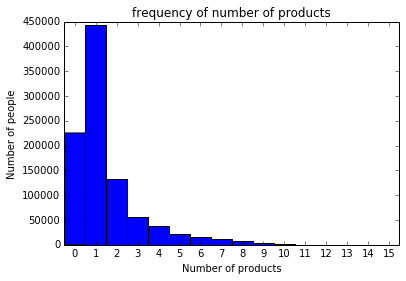

In [8]:
plt.hist(df.groupby('Customer_code')['Total_products'].max(),bins=np.arange(-0.5,15.5,1))
plt.title('frequency of number of products')
plt.xlabel("Number of products")
plt.ylabel("Number of people")
plt.xlim(-0.5, 15.5)
plt.xticks(np.arange(16))


In [9]:
X1=len(df['Customer_code'])
X2=len(df['Customer_code'].unique()) 
X3=len(df['Customer_code'])/len(df['Customer_code'].unique())

print("Total number of rows in the data:" ,X1)
print("Total number of customers:",X2)
print("Average Num of rows per customer:",X3)



Total number of rows in the data: 13647309
Total number of customers: 956645
Average Num of rows per customer: 14.265802884037443


In [10]:
def data_features(data_frame): 
    list_dem_column= list()
    list_dem_null= list()
    list_dem_dtype=list()
    list_dem_unique=list()
    for i in data_frame.columns:
        list_dem_column.append(i)
        list_dem_null.append(data_frame[i].isnull().sum())
        list_dem_dtype.append(data_frame[i].dtype)
        list_dem_unique.append(data_frame[i].unique())
      
    dict_features= {'column':list_dem_column,'null':list_dem_null,'dtype':list_dem_dtype,'unique':list_dem_unique}
    return  pd.DataFrame(dict_features)

In [11]:
data_features(df.ix[:,0:24]).head(10)

,column,dtype,null,unique
0,Partition_Column,datetime64[ns],0,"[2015-01-28T00:00:00.000000000, 2015-02-28T00:..."
1,Customer_code,int64,0,"[1375586, 1050611, 1050612, 1050613, 1050614, ..."
2,Employee_index,object,27734,"[N, nan, A, B, F, S]"
3,Country_residence,object,27734,"[ES, nan, CA, CH, CL, IE, AT, NL, FR, GB, DE, ..."
4,Customer_ sex,object,27804,"[H, V, nan]"
5,Age,object,0,"[ 35, 23, 22, 24, 65, 28, 25, 26, 53, ..."
6,Account_Opening_Date,datetime64[ns],27734,"[2015-01-12T00:00:00.000000000, 2012-08-10T00:..."
7,Customer<6_months,float64,27734,"[0.0, nan, 1.0]"
8,Customer_seniority,object,0,"[ 6, 35, 34, NA, 33, ..."
9,1_99_Prime_Mo_S_E,float64,27734,"[1.0, nan, 99.0]"


In [12]:
data_features(df.ix[:,24:48]).head(10)

,column,dtype,null,unique
0,Saving_Account,int64,0,"[0, 1]"
1,Guarantees,int64,0,"[0, 1]"
2,Current_Accounts,int64,0,"[1, 0]"
3,Derivada_Account,int64,0,"[0, 1]"
4,Payroll_Account,int64,0,"[0, 1]"
5,Junior_Account,int64,0,"[0, 1]"
6,Más_particular_Account,int64,0,"[0, 1]"
7,particular_Account,int64,0,"[0, 1]"
8,particular_Plus_Account,int64,0,"[0, 1]"
9,Short_term_depos,int64,0,"[0, 1]"


In [13]:
data_features(df[df['Employee_index'].isnull()]).head(10) 

,column,dtype,null,unique
0,Partition_Column,datetime64[ns],0,"[2015-01-28T00:00:00.000000000, 2015-02-28T00:..."
1,Customer_code,int64,0,"[1050741, 1051017, 1051064, 1051387, 1048660, ..."
2,Employee_index,object,27734,[nan]
3,Country_residence,object,27734,[nan]
4,Customer_ sex,object,27734,[nan]
5,Age,object,0,[ NA]
6,Account_Opening_Date,datetime64[ns],27734,[NaT]
7,Customer<6_months,float64,27734,[nan]
8,Customer_seniority,object,0,[ NA]
9,1_99_Prime_Mo_S_E,float64,27734,[nan]


In [14]:
len(df[df['Employee_index'].isnull()]['Customer_code'].unique()) # No of customers with missing details.

7340

** The Customers shown above can have missing information only in some rows but can have correct information in other rows. The following function checks to see if information is missing for a particular customer in all the rows. In the following table, the values under minor shows the number of occurences for a customer under missing data rows. And, the value under major shows, the number of occurences under overall data. If the difference between them is 0, we can treat these customers as customers with missing information and can delete them from over all analysis**

In [15]:
Customer_code= list() 
diff= list()
in_major=list()
in_minor=list()

df2=df[df['Employee_index'].isnull()]['Customer_code']
for i in df2.unique():
    P1=len(df[df['Customer_code']==i]['Customer_code'])
    P2=len(df2[df2==i])
    diff.append(P1-P2)
    Customer_code.append(i)
    in_major.append(P1)
    in_minor.append(P2)
    
dict_diff={'Customer_code':Customer_code,'difference':diff,'major':in_major,'minor':in_minor}
pd.DataFrame(dict_diff).head(10)

,Customer_code,difference,major,minor
0,1050741,0,2,2
1,1051017,0,2,2
2,1051064,0,4,4
3,1051387,0,3,3
4,1048660,0,5,5
5,1049775,0,5,5
6,1049774,0,2,2
7,1049838,0,5,5
8,1049700,0,1,1
9,1049406,0,5,5


In [16]:
pd.DataFrame(dict_diff)[pd.DataFrame(dict_diff)['difference']!=0].head(5)

,Customer_code,difference,major,minor
24,1054429,9,13,4
25,1054432,9,13,4
84,1058086,9,14,5
112,1023366,10,13,3
127,1028543,8,12,4


In [17]:
df3=df[df['Employee_index'].isnull()]
Customer_code1=list()
Total_products1=list()
for i in pd.DataFrame(dict_diff)[pd.DataFrame(dict_diff)['difference']!=0]['Customer_code'] :
    P4=df3[df3['Customer_code']== i]['Total_products'].max()
    Customer_code1.append(i)
    Total_products1.append(P4)
    dict_2={"Customer_code":Customer_code1,"Total_Products":Total_products1}
pd.DataFrame(dict_2).head(10)    
    

,Customer_code,Total_Products
0,1054429,1.0
1,1054432,1.0
2,1058086,1.0
3,1023366,2.0
4,1028543,1.0
5,1016940,1.0
6,1017631,3.0
7,1021657,1.0
8,1021616,1.0
9,1023116,1.0


([<matplotlib.axis.XTick at 0x137c07be0>,
 <a list of 16 Text xticklabel objects>)

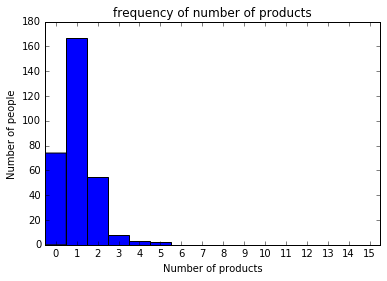

In [18]:
plt.hist(pd.DataFrame(dict_2)['Total_Products'],bins=np.arange(-0.5,15.5,1))
plt.title('frequency of number of products')
plt.xlabel("Number of products")
plt.ylabel("Number of people")
plt.xlim(-0.5, 15.5)
plt.xticks(np.arange(16))

In [19]:
pd.DataFrame(dict_2)['Total_Products'].value_counts()

1.0    167
0.0     74
2.0     55
3.0      8
4.0      3
5.0      2
Name: Total_Products, dtype: int64

In [20]:
len(pd.DataFrame(dict_diff)[pd.DataFrame(dict_diff)['difference']!=0])

309

**From the above analysis, the number of customers with missing information in some rows and information in 
other rows is 309. At this point, we can fill the data for missing columns from rows with available info rows other rows,but since the number is small, these empty rows can be deleted instead of filling **   

In [21]:
df=df[df['Employee_index'].notnull()] # removing the empty rows from data frame.

In [22]:
data_features(df.ix[:,0:24])

,column,dtype,null,unique
0,Partition_Column,datetime64[ns],0,"[2015-01-28T00:00:00.000000000, 2015-02-28T00:..."
1,Customer_code,int64,0,"[1375586, 1050611, 1050612, 1050613, 1050614, ..."
2,Employee_index,object,0,"[N, A, B, F, S]"
3,Country_residence,object,0,"[ES, CA, CH, CL, IE, AT, NL, FR, GB, DE, DO, B..."
4,Customer_ sex,object,70,"[H, V, nan]"
5,Age,object,0,"[ 35, 23, 22, 24, 65, 28, 25, 26, 53, ..."
6,Account_Opening_Date,datetime64[ns],0,"[2015-01-12T00:00:00.000000000, 2012-08-10T00:..."
7,Customer<6_months,float64,0,"[0.0, 1.0]"
8,Customer_seniority,object,0,"[ 6, 35, 34, 33, 31, ..."
9,1_99_Prime_Mo_S_E,float64,0,"[1.0, 99.0]"


In [23]:
data_features(df.ix[:,25:49])

,column,dtype,null,unique
0,Guarantees,int64,0,"[0, 1]"
1,Current_Accounts,int64,0,"[1, 0]"
2,Derivada_Account,int64,0,"[0, 1]"
3,Payroll_Account,int64,0,"[0, 1]"
4,Junior_Account,int64,0,"[0, 1]"
5,Más_particular_Account,int64,0,"[0, 1]"
6,particular_Account,int64,0,"[0, 1]"
7,particular_Plus_Account,int64,0,"[0, 1]"
8,Short_term_depos,int64,0,"[0, 1]"
9,Medium_term_depos,int64,0,"[0, 1]"


** In the above step, we have removed rows that have null information about the customers **

** In the next step, we will remove the customers that are having max total products as zero **

** The transform function will create a column having max total products for each customer row . Then it can be used to filter out the customers having zero total max number of products **

In [24]:
df['Total_products_max']=df.groupby(['Customer_code'])['Total_products'].transform( lambda x : x.max())

In [25]:
df=df[df['Total_products_max']!= 0]

In [26]:
data_features(df.ix[:,0:24])

,column,dtype,null,unique
0,Partition_Column,datetime64[ns],0,"[2015-01-28T00:00:00.000000000, 2015-02-28T00:..."
1,Customer_code,int64,0,"[1375586, 1050611, 1050612, 1050613, 1050614, ..."
2,Employee_index,object,0,"[N, A, B, F, S]"
3,Country_residence,object,0,"[ES, CA, CH, CL, IE, AT, NL, FR, GB, DE, DO, B..."
4,Customer_ sex,object,59,"[H, V, nan]"
5,Age,object,0,"[ 35, 23, 22, 24, 65, 28, 25, 26, 53, ..."
6,Account_Opening_Date,datetime64[ns],0,"[2015-01-12T00:00:00.000000000, 2012-08-10T00:..."
7,Customer<6_months,float64,0,"[0.0, 1.0]"
8,Customer_seniority,object,0,"[ 6, 35, 34, 33, 31, ..."
9,1_99_Prime_Mo_S_E,float64,0,"[1.0, 99.0]"


In [27]:
data_features(df.ix[:,24:50])

,column,dtype,null,unique
0,Saving_Account,int64,0,"[0, 1]"
1,Guarantees,int64,0,"[0, 1]"
2,Current_Accounts,int64,0,"[1, 0]"
3,Derivada_Account,int64,0,"[0, 1]"
4,Payroll_Account,int64,0,"[0, 1]"
5,Junior_Account,int64,0,"[0, 1]"
6,Más_particular_Account,int64,0,"[0, 1]"
7,particular_Account,int64,0,"[0, 1]"
8,particular_Plus_Account,int64,0,"[0, 1]"
9,Short_term_depos,int64,0,"[0, 1]"


**Till now we have removed the rows that have null information about customers and customers that donot have any product information**

** The table above shows the other null values we need to tackle. In the columns 0:24 ( columns regarding customer features) there are a total of 59 rows having no information about sex **

** We shall fix those rows before proceeding further **

In [28]:
df['Customer_code'][df['Customer_ sex'].isnull()].unique()

array([394860, 415005, 476023, 216507])

** These four customer donot have any info on their sex **

** We shall fix it next few steps.**

** Also, the payroll and pension_2 is missing for a total of 119 customers. From the below analysis, it is clear that the information is both the columns is missing for same customers. **

** The employement code for these customers is 'N' which means they are not employed. From the data , the percentage of people who are unemployed and having the products above us very less, so we assigned '0' to payroll and pensions_2 for those customers.**



In [29]:
len(df['Customer_code'][df['Payroll'].isnull()].unique()) 

119

In [30]:
len(df['Customer_code'][df['Pensions_2'].isnull()].unique())

119

**The lines of code below shows the same customers are having null value in both columns**

In [31]:
(df['Customer_code'][df['Payroll'].isnull()].unique()-df['Customer_code'][df['Pensions_2'].isnull()].unique()).sum()

0

In [32]:
df.ix[:,0:24][df['Payroll'].isnull()]

,Partition_Column,Customer_code,Employee_index,Country_residence,Customer_ sex,Age,Account_Opening_Date,Customer<6_months,Customer_seniority,1_99_Prime_Mo_S_E,...,Foreigner_index,Spouse_emp_index,channel_to_join,Deceased_index,Addres type,Province_code,Province_name,Activity_index,Gross_income_household,segmentation
46071,2015-01-28,1097831,N,ES,H,34,2012-11-08,1.0,4,1.0,...,N,NaN,KHL,N,1.0,24.0,LEON,0.0,71026.71,02 - PARTICULARES
51949,2015-01-28,1132935,N,ES,V,38,2013-05-03,1.0,2,1.0,...,N,NaN,KHN,N,1.0,28.0,MADRID,1.0,67679.01,02 - PARTICULARES
56489,2015-01-28,1118340,N,ES,V,31,2013-01-17,1.0,3,1.0,...,N,NaN,KFA,N,1.0,28.0,MADRID,0.0,81302.43,03 - UNIVERSITARIO
94788,2015-01-28,942057,N,ES,H,25,2011-09-13,1.0,1,1.0,...,N,NaN,KHM,N,1.0,28.0,MADRID,0.0,242543.25,03 - UNIVERSITARIO
99446,2015-01-28,889430,N,ES,V,44,2010-08-23,0.0,58,1.0,...,N,NaN,NaN,N,1.0,28.0,MADRID,1.0,158917.77,NaN
124491,2015-01-28,981267,N,ES,V,23,2011-11-17,1.0,3,1.0,...,N,NaN,KHM,N,1.0,28.0,MADRID,0.0,175766.97,03 - UNIVERSITARIO
144127,2015-01-28,955254,N,ES,H,20,2011-10-05,1.0,1,1.0,...,N,NaN,KHN,N,1.0,28.0,MADRID,1.0,165995.04,02 - PARTICULARES
176458,2015-01-28,1266281,N,ES,H,62,2014-06-30,1.0,2,1.0,...,N,NaN,KHK,N,1.0,41.0,SEVILLA,1.0,NaN,02 - PARTICULARES
182861,2015-01-28,1255266,N,ES,V,23,2014-04-28,1.0,3,1.0,...,N,NaN,KHN,N,1.0,29.0,MALAGA,0.0,55870.08,03 - UNIVERSITARIO
209123,2015-01-28,1374202,N,ES,V,51,2015-01-05,1.0,4,1.0,...,N,NaN,KHK,N,1.0,30.0,MURCIA,1.0,27250.20,02 - PARTICULARES


In [33]:
df['Employee_index'][df['Payroll'].isnull()].unique()

array(['N'], dtype=object)

In [34]:
df['Payroll'][df['Employee_index']=='N'].sum(skipna=True)/len(df['Payroll'][df['Employee_index']=='N'])

0.06592735680840295

** Since only 6 percent of employees with out job have a payroll account and Employee index of pay roll with Null value in N, I am going ro assign 0 for null values. ** 

In [35]:
df['Employee_index'][df['Pensions_2'].isnull()].unique()

array(['N'], dtype=object)

In [36]:
df['Pensions_2'][df['Employee_index']=='N'].sum(skipna=True)/len(df['Pensions_2'][df['Employee_index']=='N'])

0.07160539625207371

** Since only 7 percent of employees with out job have a payroll account and Employee index of pay roll with Null value in N, I am going ro assign 0 for null values. **

In [37]:
df['Payroll'][df['Payroll'].isnull()]= 0
df['Pensions_2'][df['Pensions_2'].isnull()]=0

In [38]:
df['Payroll']=df['Payroll'].astype(int64)
df['Pensions_2']=df['Pensions_2'].astype(int64)

In [39]:
df.ix[:,24:48].isnull().sum()

Saving_Account             0
Guarantees                 0
Current_Accounts           0
Derivada_Account           0
Payroll_Account            0
Junior_Account             0
Más_particular_Account     0
particular_Account         0
particular_Plus_Account    0
Short_term_depos           0
Medium_term_depos          0
Long_term_depos            0
e-account                  0
Funds                      0
Mortgage                   0
Pensions_1                 0
Loans                      0
Taxes                      0
Credit_Card                0
Securities                 0
Home_Account               0
Payroll                    0
Pensions_2                 0
Direct_Debit               0
dtype: int64

** From the table above,we can see that all the null values in product information are taken care **

** The next step is to resolve all the missing information related to customers . First step is fix the information about customer sex.**

In [40]:
df.ix[:,0:24].isnull().sum()

Partition_Column                 0
Customer_code                    0
Employee_index                   0
Country_residence                0
Customer_ sex                   59
Age                              0
Account_Opening_Date             0
Customer<6_months                0
Customer_seniority               0
1_99_Prime_Mo_S_E                0
Last_Dt_prime_cust        11271507
Cust_type_beg_mon            87491
Cust_rel_type_beg_mon        87491
Residence_index                  0
Foreigner_index                  0
Spouse_emp_index          11285094
channel_to_join              98375
Deceased_index                   0
Addres type                      1
Province_code                54599
Province_name                54599
Activity_index                   0
Gross_income_household     2215976
segmentation                 99213
dtype: int64

In [41]:
df.groupby('Customer_ sex')['Gross_income_household'].median()

Customer_ sex
H     98728.89
V    104068.83
Name: Gross_income_household, dtype: float64

** Gross Household income median is used to estimate customer sex. From the line above,we can see that sex 'H' has less median income than 'V'.**

In [42]:
S1=df['Customer_code'][df['Customer_ sex'].isnull()].unique() # The sex for these four customers is missing

In [43]:
len(S1)

4

In [44]:
df.groupby('Customer_ sex')['Partition_Column'].size()

Customer_ sex
H    5168113
V    6118560
dtype: int64

In [45]:
df[['Customer_code','Gross_income_household','Customer_ sex']][df['Customer_code'].isin(S1)].head(5)

,Customer_code,Gross_income_household,Customer_ sex
366601,394860,NaN,NaN
573165,415005,NaN,NaN
887645,415005,NaN,NaN
898766,394860,NaN,NaN
1324482,476023,89991.42,NaN


In [46]:
for i in S1 :
    if df['Gross_income_household'][df['Customer_code']== i].notnull().sum()==0 :
        df['Customer_ sex'][df['Customer_code']== i] = 'V'
    elif df['Gross_income_household'][df['Customer_code']== i].max() < 98728.89 :
        df['Customer_ sex'][df['Customer_code']== i]= 'H'
    elif df['Gross_income_household'][df['Customer_code']== i].max() > 104068.83 :
        df['Customer_ sex'][df['Customer_code']== i]= 'V'  
    elif 98728.89 < df['Gross_income_household'][df['Customer_code']== i].max() <104068.83 :
        df['Customer_sex'][df['Customer_code']== i]= 'V'
                

/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [47]:
df.ix[:,0:24].isnull().sum()

Partition_Column                 0
Customer_code                    0
Employee_index                   0
Country_residence                0
Customer_ sex                    0
Age                              0
Account_Opening_Date             0
Customer<6_months                0
Customer_seniority               0
1_99_Prime_Mo_S_E                0
Last_Dt_prime_cust        11271507
Cust_type_beg_mon            87491
Cust_rel_type_beg_mon        87491
Residence_index                  0
Foreigner_index                  0
Spouse_emp_index          11285094
channel_to_join              98375
Deceased_index                   0
Addres type                      1
Province_code                54599
Province_name                54599
Activity_index                   0
Gross_income_household     2215976
segmentation                 99213
dtype: int64

** Spouse employee index is not available for majority of the customers. It is hard to estimate that parameter from this data. So, I will be omitting the column from the data frame for further analysis **

In [48]:
del df['Spouse_emp_index']

**The next step is to fix all the null values in segmentation. If income is available for the customer, they are assigned to different buckets based on their income. For the customers not having income details, we shall assign segmentation based on the population proportion ** 

In [49]:
df['segmentation'].isnull().sum()

99213

In [50]:
df['segmentation'].unique()

array(['02 - PARTICULARES', '03 - UNIVERSITARIO', '01 - TOP', nan], dtype=object)

In [51]:
df.groupby('segmentation')['Gross_income_household'].median()

segmentation
01 - TOP              141562.68
02 - PARTICULARES     109482.51
03 - UNIVERSITARIO     87155.25
Name: Gross_income_household, dtype: float64

In [52]:
df['segmentation'][(df['segmentation'].isnull())&(df['Gross_income_household']>141562.68)]= '01 - TOP'

/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [53]:
df['segmentation'][(df['segmentation'].isnull())&(df['Gross_income_household']< 87155.25)]='03 - UNIVERSITARIO'

/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
df['segmentation'][(df['segmentation'].isnull())&(df['Gross_income_household']>87155.25)&(df['Gross_income_household']<141562.68)]='02 - PARTICULARES'

/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
df.groupby('segmentation').size()

segmentation
01 - TOP               568290
02 - PARTICULARES     6293752
03 - UNIVERSITARIO    4356890
dtype: int64

** A total of 67,800 customers with missing 'segmentation' information donot have 'gross house hold income' information. For these customers, we shall assign the segmentation based on population proportion **

In [56]:
len(df['segmentation'][df['segmentation'].isnull()])

67800

In [57]:
array1=np.arange(67800)

In [58]:
S2=pd.Series(array1,index=df['segmentation'][df['segmentation'].isnull()].index)

In [59]:
((df.groupby('segmentation').size())/df.groupby('segmentation').size().sum())*67800

segmentation
01 - TOP               3434.378780
02 - PARTICULARES     38035.383903
03 - UNIVERSITARIO    26330.237317
dtype: float64

In [60]:
S2[0:3436]='01 - TOP'
S2[3436:41470]='02 - PARTICULARES'
S2[41470:67800]='03 - UNIVERSITARIO'


In [61]:
df['segmentation'][df['segmentation'].isnull()]=S2

/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [62]:
df.groupby('segmentation').size()

segmentation
01 - TOP               571726
02 - PARTICULARES     6331786
03 - UNIVERSITARIO    4383220
dtype: int64

In [63]:
df['segmentation'].isnull().sum()

0

** The missing values in segmentation are filled **

** The next step is to tackle the missing values in province. Customers are assigned province based on population proportion **

In [64]:
S_provincename=np.round((df.groupby('Province_name').size()/df.groupby('Province_name').size().sum())*54599)

In [65]:
df_provincename=pd.DataFrame(S_provincename)

In [66]:
df_provincename['Province_name']=df_provincename.index

In [67]:
df_provincename=df_provincename.rename(columns={0:'Proportion','Province_name':'Province_name'})

In [68]:
df_provincename['Proportion']=df_provincename['Proportion'].astype(int64)
df_provincename

,Proportion,Province_name
Province_name,,
ALAVA,150,ALAVA
ALBACETE,491,ALBACETE
ALICANTE,1266,ALICANTE
ALMERIA,237,ALMERIA
ASTURIAS,1108,ASTURIAS
AVILA,162,AVILA
BADAJOZ,828,BADAJOZ
"BALEARS, ILLES",481,"BALEARS, ILLES"
BARCELONA,4747,BARCELONA


In [69]:
list_province_name=list()
for i in df_provincename.index :
    df_provincename.get_value(i,'Proportion') * list([i])
    list_province_name.append(df_provincename.get_value(i,'Proportion') * list([i]))
    

In [70]:
list_province_name=list(itertools.chain.from_iterable(list_province_name))[:54599]

In [71]:
df['Province_name'][df['Province_name'].isnull()]

2031        NaN
4139        NaN
4342        NaN
5907        NaN
15222       NaN
17059       NaN
25576       NaN
27527       NaN
28466       NaN
28514       NaN
41830       NaN
48362       NaN
48855       NaN
49772       NaN
50066       NaN
50881       NaN
50976       NaN
51911       NaN
51918       NaN
51948       NaN
53028       NaN
53666       NaN
54245       NaN
56659       NaN
57539       NaN
57661       NaN
57875       NaN
69666       NaN
77466       NaN
78826       NaN
           ... 
13584478    NaN
13593328    NaN
13595904    NaN
13604560    NaN
13605473    NaN
13605523    NaN
13607076    NaN
13608237    NaN
13610232    NaN
13610299    NaN
13610395    NaN
13611267    NaN
13612015    NaN
13612023    NaN
13612907    NaN
13614304    NaN
13614877    NaN
13615358    NaN
13616168    NaN
13616776    NaN
13617411    NaN
13618002    NaN
13622177    NaN
13625237    NaN
13631079    NaN
13639501    NaN
13640647    NaN
13643189    NaN
13645938    NaN
13646171    NaN
Name: Province_name, dty

In [72]:
S5=pd.Series(np.array(list_province_name), index=df[df['Province_name'].isnull()].index)

In [73]:
df['Province_name'][df['Province_name'].isnull()]=S5

/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [74]:
df['Province_name'].isnull().sum()

0

** The null values in province_name column are filled **

** The next step is fill the null values in channel to Join **

** They are filled based on population proportion **

In [75]:
df['channel_to_join'].isnull().sum()

98375

In [76]:
S7= pd.Series(np.arange(98375), index=df[df['channel_to_join'].isnull()].index)

In [77]:
S_channel=pd.Series(((df.groupby('channel_to_join').size())/(df.groupby('channel_to_join').size().sum()))*98375)

In [78]:
df_channel= pd.DataFrame(np.round(S_channel).astype(int64))

In [79]:
df_channel['Channel']=df_channel.index

In [80]:
df_channel.head(5)

,0,Channel
channel_to_join,,
004,1,004
007,157,007
013,202,013
K00,1,K00
KAA,452,KAA


In [81]:
list_channel_name=list()
for i in df_channel.index :
    df_channel.get_value(i,0) * list([i])
    list_channel_name.append(df_channel.get_value(i,0) * list([i]))

In [82]:
list_channel_name=list(itertools.chain.from_iterable(list_channel_name))[:98375]

In [83]:
df['channel_to_join'][df['channel_to_join'].isnull()]=pd.Series(np.array(list_channel_name),index=df[df['channel_to_join'].isnull()].index)

/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [84]:
df['channel_to_join'].isnull().sum()

0

** All the Null values in Channel to Join are fixed **

In [85]:
del(df['Province_code'])

In [86]:
df.ix[:,0:22].isnull().sum()

Partition_Column                 0
Customer_code                    0
Employee_index                   0
Country_residence                0
Customer_ sex                    0
Age                              0
Account_Opening_Date             0
Customer<6_months                0
Customer_seniority               0
1_99_Prime_Mo_S_E                0
Last_Dt_prime_cust        11271507
Cust_type_beg_mon            87491
Cust_rel_type_beg_mon        87491
Residence_index                  0
Foreigner_index                  0
channel_to_join                  0
Deceased_index                   0
Addres type                      1
Province_name                    0
Activity_index                   0
Gross_income_household     2215976
segmentation                     0
dtype: int64

** The equal num of missing values in both 'Cust_type_beg_mon' and 'Cust_rel_type_beg_mon' can be possibly due to same customers having null values in both the columns. I will check if this the case**

In [87]:
df['Cust_type_beg_mon'].unique()

array([1.0, 3.0, 2.0, nan, '1.0', '1', '3', '3.0', '2.0', 'P', '4', 4.0,
       '4.0', '2'], dtype=object)

In [88]:
df['Cust_rel_type_beg_mon'].unique()

array(['A', 'I', 'P', nan, 'R', 'N'], dtype=object)

** Since all the categories is numeric in 'Cust_type_beg_mon' , I am changing p to 5.

In [89]:
df['Cust_type_beg_mon']=df['Cust_type_beg_mon'].replace('P', 5) 

In [90]:
df['Cust_type_beg_mon']=pd.to_numeric(df['Cust_type_beg_mon'])

In [91]:
df['Cust_type_beg_mon'].isnull().sum()

87491

In [92]:
df['Cust_rel_type_beg_mon'].isnull().sum()

87491

In [93]:
(df['Customer_code'][df['Cust_type_beg_mon'].isnull()]-df['Customer_code'][df['Cust_rel_type_beg_mon'].isnull()]).sum()

0

** Same customers are having null values in both 'Cust_type_beg_month' and 'Cust_rel_type_beg_mon' **

In [94]:
df.groupby('Cust_type_beg_mon')['Customer_code'].size()

Cust_type_beg_mon
1.0    11194340
2.0         877
3.0        3070
4.0         237
5.0         717
dtype: int64

In [95]:
df.groupby('Cust_rel_type_beg_mon')['Customer_code'].size()

Cust_rel_type_beg_mon
A    5997791
I    5197426
N          2
P       3307
R        715
dtype: int64

In [96]:
df['Cust_type_beg_mon'][df['Cust_type_beg_mon'].isnull()]= 1

/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [97]:
S_cust_rel= pd.Series(np.arange(87491), index=df[df['Cust_rel_type_beg_mon'].isnull()].index)

In [98]:
S_cust_rel[0:43745] = 'A'
S_cust_rel[43475:87491] = 'I'


In [99]:
len(S_cust_rel)

87491

In [100]:
df['Cust_rel_type_beg_mon'][df['Cust_rel_type_beg_mon'].isnull()]=S_cust_rel

/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [101]:
df.ix[:,0:22].isnull().sum()

Partition_Column                 0
Customer_code                    0
Employee_index                   0
Country_residence                0
Customer_ sex                    0
Age                              0
Account_Opening_Date             0
Customer<6_months                0
Customer_seniority               0
1_99_Prime_Mo_S_E                0
Last_Dt_prime_cust        11271507
Cust_type_beg_mon                0
Cust_rel_type_beg_mon            0
Residence_index                  0
Foreigner_index                  0
channel_to_join                  0
Deceased_index                   0
Addres type                      1
Province_name                    0
Activity_index                   0
Gross_income_household     2215976
segmentation                     0
dtype: int64

** These are the customers that have changed their type in given time period **

In [102]:
df['Last_Dt_prime_cust'][df['1_99_Prime_Mo_S_E']==1.0].isnull().sum() # df['Last_Dt_prime_cust'] is null when cust is prime

11271507

** Last_Dt_Prime_Cust is null when the 1_99_Prime_Mo_S_E is 1 and has a date only when 1_99_Prime_Mo_S_E is 0.**

In [103]:
(df['1_99_Prime_Mo_S_E']==99.0).sum() # no.of not primary customers

15225

In [104]:
df[['Customer_code','Partition_Column','Last_Dt_prime_cust']][df['1_99_Prime_Mo_S_E']==99.0]

,Customer_code,Partition_Column,Last_Dt_prime_cust
509,1050477,2015-01-28,2015-07-02
2061,1049899,2015-01-28,2015-07-02
2624,1056267,2015-01-28,2015-07-23
4306,1054640,2015-01-28,2015-07-06
5451,1043896,2015-01-28,2015-07-30
6212,1042563,2015-01-28,2015-07-20
7614,1047538,2015-01-28,2015-07-08
7652,1046978,2015-01-28,2015-07-30
8866,1045462,2015-01-28,2015-07-22
8989,1045387,2015-01-28,2015-07-17


** From the above line, some customers are shown as not primary even when their Last_Dt_prime_cust is in future. This looks to be an error. If the customer has become non primary at a future date, he has to have code 1, and not 99. **

In [105]:
S_prime=df[['Customer_code','Partition_Column','Last_Dt_prime_cust']][df['Last_Dt_prime_cust'].notnull()]['Customer_code'].unique()

** For all the customers that are in non-primary category, I am trying to look at their history from the data set and see when they have changed from primary to non-primary. **

In [106]:
df_prime_cust=df[['Customer_code','Partition_Column','Last_Dt_prime_cust','1_99_Prime_Mo_S_E' ]][df['Customer_code'].isin(S_prime)].sort_values(['Customer_code','Partition_Column'])

In [107]:
df_prime_cust[df_prime_cust['1_99_Prime_Mo_S_E']==99.0].head(10)

,Customer_code,Partition_Column,Last_Dt_prime_cust,1_99_Prime_Mo_S_E
5319232,15891,2015-08-28,2015-08-05,99.0
11170914,16137,2016-03-28,2016-03-17,99.0
8618202,16254,2015-12-28,2015-12-04,99.0
416600,16817,2015-01-28,2015-07-15,99.0
836621,16817,2015-02-28,2015-07-15,99.0
1674354,16817,2015-03-28,2015-07-15,99.0
2092577,16817,2015-04-28,2015-07-15,99.0
2933327,16817,2015-05-28,2015-07-15,99.0
3565387,16817,2015-06-28,2015-07-15,99.0
4079375,16817,2015-07-28,2015-07-15,99.0


** From the above line, some customers have their Last_Dt_Prime_cust before partition_column  and some have Last_Dt_Prime_cust after partition_column. If a customer has partition_column before Last_Dt_Prime_cust, for that month he has to be changed from 99 to 1.**

In [108]:
df['1_99_Prime_Mo_S_E'][(df['Last_Dt_prime_cust'].notnull())&(df['Partition_Column']<df['Last_Dt_prime_cust'])]=1

/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [109]:
(df['Partition_Column']-df['Last_Dt_prime_cust'])[df['1_99_Prime_Mo_S_E']==99.0].sort_values(ascending=False).head(10)

3777108   27 days
8650693   27 days
8715135   27 days
8718893   27 days
8720642   27 days
8726016   27 days
8728071   27 days
8737846   27 days
8738307   27 days
8745942   27 days
dtype: timedelta64[ns]

**All the customers having code 99, have changed to that status within the same month. The column 'Last_Dt_prime_Cust' doesnt offer any additional information, so it will be removed from further analysis **

In [110]:
del(df['Last_Dt_prime_cust']) 
del(df['Addres type'])


In [111]:
df.columns

Index(['Partition_Column', 'Customer_code', 'Employee_index',
       'Country_residence', 'Customer_ sex', 'Age', 'Account_Opening_Date',
       'Customer<6_months', 'Customer_seniority', '1_99_Prime_Mo_S_E',
       'Cust_type_beg_mon', 'Cust_rel_type_beg_mon', 'Residence_index',
       'Foreigner_index', 'channel_to_join', 'Deceased_index', 'Province_name',
       'Activity_index', 'Gross_income_household', 'segmentation',
       'Saving_Account', 'Guarantees', 'Current_Accounts', 'Derivada_Account',
       'Payroll_Account', 'Junior_Account', 'Más_particular_Account',
       'particular_Account', 'particular_Plus_Account', 'Short_term_depos',
       'Medium_term_depos', 'Long_term_depos', 'e-account', 'Funds',
       'Mortgage', 'Pensions_1', 'Loans', 'Taxes', 'Credit_Card', 'Securities',
       'Home_Account', 'Payroll', 'Pensions_2', 'Direct_Debit',
       'Total_products', 'Total_products_max'],
      dtype='object')

In [112]:
df.ix[:,0:21].isnull().sum()

Partition_Column                0
Customer_code                   0
Employee_index                  0
Country_residence               0
Customer_ sex                   0
Age                             0
Account_Opening_Date            0
Customer<6_months               0
Customer_seniority              0
1_99_Prime_Mo_S_E               0
Cust_type_beg_mon               0
Cust_rel_type_beg_mon           0
Residence_index                 0
Foreigner_index                 0
channel_to_join                 0
Deceased_index                  0
Province_name                   0
Activity_index                  0
Gross_income_household    2215976
segmentation                    0
Saving_Account                  0
dtype: int64

** The only column with pending null values is Gross_income_household . These null values will be filled based on customer segmentation **

In [113]:
df.groupby('segmentation')['Gross_income_household'].median()

segmentation
01 - TOP              142926.90
02 - PARTICULARES     109475.82
03 - UNIVERSITARIO     86862.54
Name: Gross_income_household, dtype: float64

In [114]:
df['Gross_income_household'][(df['Gross_income_household'].isnull()) & (df['segmentation']=='01 - TOP')] = 142926.90
df['Gross_income_household'][(df['Gross_income_household'].isnull()) & (df['segmentation']=='02 - PARTICULARES')] = 109475.82
df['Gross_income_household'][(df['Gross_income_household'].isnull()) & (df['segmentation']=='03 - UNIVERSITARIO')] = 86862.54


/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/sowmyamoka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [115]:
df['Age']=df['Age'].astype('int64')
df['Customer_seniority']=df['Customer_seniority'].astype('int64')

In [116]:
data_features(df.ix[:,0:20])

,column,dtype,null,unique
0,Partition_Column,datetime64[ns],0,"[2015-01-28T00:00:00.000000000, 2015-02-28T00:..."
1,Customer_code,int64,0,"[1375586, 1050611, 1050612, 1050613, 1050614, ..."
2,Employee_index,object,0,"[N, A, B, F, S]"
3,Country_residence,object,0,"[ES, CA, CH, CL, IE, AT, NL, FR, GB, DE, DO, B..."
4,Customer_ sex,object,0,"[H, V]"
5,Age,int64,0,"[35, 23, 22, 24, 65, 28, 25, 26, 53, 27, 32, 3..."
6,Account_Opening_Date,datetime64[ns],0,"[2015-01-12T00:00:00.000000000, 2012-08-10T00:..."
7,Customer<6_months,float64,0,"[0.0, 1.0]"
8,Customer_seniority,int64,0,"[6, 35, 34, 33, 31, 21, 16, 27, 9, 22, 13, 29,..."
9,1_99_Prime_Mo_S_E,float64,0,"[1.0, 99.0]"


In [117]:
# Finally writing the cleaned data to a different csv file.
df.to_csv('/Users/sowmyamoka/Satish_Python/Capstone_Projects/Cleaned_Data/Cleaned_Data.csv')